## Implementation of RNN
In this file, we implement RNN with keras. Firstly, we read the data. Then we use the training dataset to training our 15 different models. We try to shuffle the dataset before push them into the model, this can improve the reliability of our model. Finally, we evaluate ours models with test datasets.

### import libary

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers.recurrent import LSTM
from sklearn import model_selection

Using TensorFlow backend.


### Read data in the file of attack1 

In [2]:
cols = [2,3,4,9,10,15,16] #id, xr ,yr, xt, yt, RSSI, label.
data = pd.read_csv("dataset/attack1withlabels.csv",usecols=cols)
data = data.dropna(axis=0, how="any")#remove invalid data
data_id = data.iloc[:,0]
# attack 1: distance is too far recevier and transmitter
pos_xr = data.iloc[:,1]
pos_yr = data.iloc[:,2]
pos_xt = data.iloc[:,3]
pos_yt = data.iloc[:,4]
rssi   = data.iloc[:,5]
label = data.iloc[:,6]

In [3]:

X = data.iloc[:,:6]
y = data.iloc[:,6]


### Construct the model and evaluate 
In our case, we try to training the model with 15 different training data. And then we take the rest of data to evaluate our model. To prove that our model could classify the test data with high accurrency, firstly, we calculate the ratio of no attack in all the data and we display it in red line. Then we compare it with 15 different the result of test set (blue points). We notice that, it real improve the accurency of prediction.   

-------------------------------------------------------------------------
The index of model is :  0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
85142/85142 [==============================] - 2s 21us/step
-------------------------------------------------------------------------
The index of model is :  1
85142/85142 [==============================] - 2s 21us/step
-------------------------------------------------------------------------
The index of model is :  2
85142/85142 [==============================] - 2s 24us/step
-------------------------------------------------------------------------
The index of model is :  3
85142/85142 [==============================] - 2s 25us/step
-------------------------------------------------------------------------
The index of model is :  4
85142/85142 [==============================] - 2s 26us/step
-------------------------------------------------------------------------
T

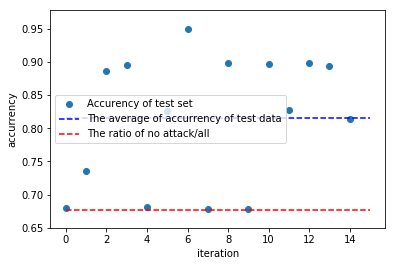

accurrency of test data =  0.8160328235960982
The ratio of no attack in all test dataset =  0.6773625237837965


In [4]:
accurency_list = []
itr =15
for i in range(itr):
    # model implementation
    print("-------------------------------------------------------------------------")
    print("The index of model is : ", i)
    # We use the Sequential function in keras to add layer.
    model = Sequential()
    model.add(LSTM(32, input_shape=(None,6),return_sequences=False))
    model.add(Dense(8, input_dim=6))
    model.add(Dense(1, activation="relu"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    #split dataset to training dataset and test dataset with ratio = 0.2. It means that there are 80000 training dataset
    # and 20000 test dataset with the order shuffed
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2)
    #To transforme the training dataset and test dataset to the forme LSTM
    #X train dataset.shape = (80000,6) -> (80000,1,6). In fact, 1 is the timestep, in our case, we fix it with value =1.
    X_train = np.reshape(X_train.values, (X_train.shape[0], 1,X_train.shape[1]))
    X_test =np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    #fit data
    model.fit(X_train,y_train,verbose = 0,epochs=10,batch_size=1000)
    #evaluation data
    cost = model.evaluate(X_test,y_test)
    #print('loss \n',cost[0])
    #print('accurency \n',cost[1])
    accurency_list.append(cost[1])
plt.scatter(range(itr),accurency_list,label = 'Accurency of test set')
plt.hlines(np.average(accurency_list),0,itr,colors="b",linestyles='dashed', label="The average of accurrency of test data")
plt.hlines(1-sum(y_test)/y_test.shape[0], 0, itr, colors = "r", linestyles = "dashed",label="The ratio of no attack/all")
plt.legend(loc='best')
plt.xlabel("iteration")
plt.ylabel("accurrency")
plt.show()
print("accurrency of test data = ", np.average(accurency_list))
print("The ratio of no attack in all test dataset = ",1-sum(y_test)/y_test.shape[0] )
